In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

In [2]:
#data loader class
class DataLoader:
  def __init__(self,file_name):
    self.file_name = file_name
    
 
  def read_csv(self):
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df

In [3]:
DataLoader_obj= DataLoader('newclean_tweet_data.csv')

In [4]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()

Unnamed: 0.1  Unnamed: 0                      created at  \
0                 0           0  Wed Aug 03 20:19:13 +0000 2022   
1                 1           1  Tue Aug 02 15:24:42 +0000 2022   
2                 2           2  Tue Aug 02 15:02:35 +0000 2022   
3                 3           3  Mon Aug 01 13:51:42 +0000 2022   
4                 4           4  Sun Jul 31 20:02:20 +0000 2022   
...             ...         ...                             ...   
28603         28603       28603  Tue Aug 02 14:40:31 +0000 2022   
28604         28604       28604  Tue Aug 02 13:25:42 +0000 2022   
28605         28605       28605  Tue Aug 02 13:08:29 +0000 2022   
28606         28606       28606  Tue Aug 02 13:03:37 +0000 2022   
28607         28607       28607  Sun Jul 31 18:50:59 +0000 2022   

                                                  source  \
0      #Pelosi airplane landed safely in #Taiwan 🇹🇼  ...   
1      Watch the video of the beginning of the Chines...   
2      #Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...   
3      #HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...   
4      #Pelosi\n#china\nChina Time ✌️ https://t.co/tE...   
...                                                  ...   
28603  Final approach to Taipei\n#Pelosi #SPAR19 http...   
28604  #SPAR19 getting closer #Taiwan #NANCY_PELOSI I...   
28605  #SPAR19 is heading directly to #Taiwan let’s h...   
28606  #SPAR19 prayers that China doesn’t overreact f...   
28607  Where is Paul #Pelosi today?\n\nAsking for a f...   

                                           original_text  followers_count  \
0      <a href="http://twitter.com/download/android" ...              318   
1      <a href="https://mobile.twitter.com" rel="nofo...              764   
2      <a href="http://twitter.com/download/android" ...               64   
3      <a href="http://twitter.com/download/android" ...               60   
4      <a href="http://twitter.com/download/android" ...               39   
...                                                  ...              ...   
28603  <a href="https://mobile.twitter.com" rel="nofo...             1136   
28604  <a href="http://twitter.com/download/iphone" r...               40   
28605  <a href="http://twitter.com/download/iphone" r...               40   
28606  <a href="http://twitter.com/download/iphone" r...               40   
28607  <a href="https://mobile.twitter.com" rel="nofo...             1136   

       friends_count  retweet_count  favorite_count  original_author  \
0                373              0               0       DzCritical   
1                144              0               0          toopsat   
2                 47              0               0    NassimaLilEmy   
3                463              0               0         d_dhayae   
4                206              0               0  Mohamme65404115   
...              ...            ...             ...              ...   
28603            574              0               0        AndStrats   
28604            162              0               0       jen_mazzei   
28605            162              0               0       jen_mazzei   
28606            162              0               0       jen_mazzei   
28607            574              0               0        AndStrats   

       statuses_count                                           hashtags  \
0                 888  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
1                1597  [{'text': 'Pelosi', 'indices': [149, 156]}, {'...   
2                2293  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
3                  44  [{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...   
4                1313  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
...               ...                                                ...   
28603            2958  [{'text': 'Pelosi', 'indices': [25, 32]}, {'te...   
28604             120  [{'text': 'SPAR19', 'indices': [0, 7]}, {'text...   
28605  

In [5]:
len(tweets_df)


28608

In [16]:
tweets_df.head()

Unnamed: 0.1  Unnamed: 0                      created at  \
0             0           0  Wed Aug 03 20:19:13 +0000 2022   
1             1           1  Tue Aug 02 15:24:42 +0000 2022   
2             2           2  Tue Aug 02 15:02:35 +0000 2022   
3             3           3  Mon Aug 01 13:51:42 +0000 2022   
4             4           4  Sun Jul 31 20:02:20 +0000 2022   

                                              source  \
0  #Pelosi airplane landed safely in #Taiwan 🇹🇼  ...   
1  Watch the video of the beginning of the Chines...   
2  #Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...   
3  #HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...   
4  #Pelosi\n#china\nChina Time ✌️ https://t.co/tE...   

                                       original_text  followers_count  \
0  <a href="http://twitter.com/download/android" ...              318   
1  <a href="https://mobile.twitter.com" rel="nofo...              764   
2  <a href="http://twitter.com/download/android" ...               64   
3  <a href="http://twitter.com/download/android" ...               60   
4  <a href="http://twitter.com/download/android" ...               39   

   friends_count  retweet_count  favorite_count  original_author  \
0            373              0               0       DzCritical   
1            144              0               0          toopsat   
2             47              0               0    NassimaLilEmy   
3            463              0               0         d_dhayae   
4            206              0               0  Mohamme65404115   

   statuses_count                                           hashtags  \
0             888  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
1            1597  [{'text': 'Pelosi', 'indices': [149, 156]}, {'...   
2            2293  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
3              44  [{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...   
4            1313  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   

  user_mentions  polarity  subjectivity  
0            []  0.300000      0.203571  
1            []  0.000000      0.000000  
2            []  0.000000      0.000000  
3            []  0.433333      0.733333  
4            []  0.000000      0.000000

In [21]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    tweets_df = self.df
#         .loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['original_text']=tweets_df['original_text'].astype(str)
    tweets_df['original_text'] = tweets_df['original_text'].apply(lambda x: x.lower())
    tweets_df['original_text']= tweets_df['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['original_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return word_list, word_to_id, corpus_1

In [22]:
PrepareData_obj=PrepareData(tweets_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [23]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (2, 1), (4, 1), (8, 1), (9, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (2, 1), (4, 1), (8, 1), (9, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (10, 1), (11, 1)], [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 

In [24]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [25]:
print(id_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
pprint(lda_model.print_topics())

[(0,
  '0.200*"relnofollowtwitter" + 0.200*"for" + 0.200*"a" + '
  '0.200*"hrefhttptwittercomdownloadandroid" + 0.200*"androida" + '
  '0.000*"media" + 0.000*"studioa" + 0.000*"hrefhttpsstudiotwittercom" + '
  '0.000*"hrefhttpitunesapplecomusapptwitterid409789998mt12" + 0.000*"maca"'),
 (1,
  '0.201*"appa" + 0.200*"a" + 0.200*"relnofollowtwitter" + 0.200*"web" + '
  '0.200*"hrefhttpsmobiletwittercom" + 0.000*"adsa" + '
  '0.000*"hrefhttpsadstwittercom" + 0.000*"relnofollowblog2social" + '
  '0.000*"hrefhttpswwwblog2socialcom" + 0.000*"media"'),
 (2,
  '0.200*"relnofollowtwitter" + 0.200*"for" + 0.200*"a" + '
  '0.199*"hrefhttptwittercomdownloadiphone" + 0.199*"iphonea" + 0.000*"ipada" '
  '+ 0.000*"hrefhttptwittercomdownloadipad" + 0.000*"maca" + '
  '0.000*"hrefhttpitunesapplecomusapptwitterid409789998mt12" + '
  '0.000*"relnofollowalbatross"'),
 (3,
  '0.277*"a" + 0.081*"hrefhttptwittercomdownloadipad" + 0.081*"ipada" + '
  '0.068*"relnofollowlinkedina" + 0.068*"hrefhttpwwwlinkedinco

In [29]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('relnofollowtwitter', 0.2002068),
   ('for', 0.20004708),
   ('a', 0.19992982),
   ('hrefhttptwittercomdownloadandroid', 0.1998287),
   ('androida', 0.1998287),
   ('media', 2.5121267e-06),
   ('studioa', 2.5121267e-06),
   ('hrefhttpsstudiotwittercom', 2.5121267e-06),
   ('hrefhttpitunesapplecomusapptwitterid409789998mt12', 2.3766524e-06),
   ('maca', 2.3766524e-06)]),
 (1,
  [('appa', 0.20097475),
   ('a', 0.19979091),
   ('relnofollowtwitter', 0.19966225),
   ('web', 0.19954365),
   ('hrefhttpsmobiletwittercom', 0.19954355),
   ('adsa', 8.763715e-06),
   ('hrefhttpsadstwittercom', 8.763715e-06),
   ('relnofollowblog2social', 7.200849e-06),
   ('hrefhttpswwwblog2socialcom', 7.200849e-06),
   ('media', 7.1870963e-06)]),
 (2,
  [('relnofollowtwitter', 0.20044224),
   ('for', 0.20044218),
   ('a', 0.19980931),
   ('hrefhttptwittercomdownloadiphone', 0.1994117),
   ('iphonea', 0.1994117),
   ('ipada', 7.2066778e-06),
   ('hrefhttptwittercomdownloadipad', 7.2066778e-06),
   ('mac

In [30]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -1.8331207549720463

 Ldamodel Coherence Score/Accuracy on Tweets:  0.47259724474512294


In [38]:
!pip install pyLDAvis 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.2 kB/s eta 0:00:00m eta 0:00:010:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 44.0 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 32.5 kB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=315672c620719b51148a338f17905a33881ecc2b02890a9f9d906847e31af984
  Stored in directory: /home/tina/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=01121f031ee5120edc9484d023dc743d85dc0d898ce1d2bfcc4fe6a276ce273e
  Stored in directory: /home/tina/.cache/pip/wheels/8e/7

In [39]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/home/tina/Week0/Week0env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.191005 -0.023523       1        1  62.657059
2     -0.189813 -0.023839       2        1  22.153059
1     -0.114707  0.044297       3        1  14.201949
3      0.258273 -0.221894       4        1   0.517741
4      0.237252  0.224960       5        1   0.470192, topic_info=                                 Term          Freq         Total Category  \
0                                   a  28588.000000  28588.000000  Default   
8    hrefhttptwittercomdownloadiphone   6288.000000   6288.000000  Default   
9                             iphonea   6288.000000   6288.000000  Default   
3   hrefhttptwittercomdownloadandroid  17820.000000  17820.000000  Default   
1                            androida  17820.000000  17820.000000  Default   
..                                ...           ...           ...      ...   
37               relnofollowalbatross      0.090464      2.280392   Topic5   
0                                   a    216.736954  28588.402215   Topic5   
5                                appa      0.091721   4063.112818   Topic5   
45                               adsa      0.091175      5.156236   Topic5   
46             hrefhttpsadstwittercom      0.091175      5.156236   Topic5   

    logprob  loglift  
0   30.0000  30.0000  
8   29.0000  29.0000  
9   28.0000  28.0000  
3   27.0000  27.0000  
1   26.0000  26.0000  
..      ...      ...  
37  -8.9089   2.1326  
0   -1.1274   0.4777  
5   -8.8951  -5.3389  
45  -8.9011   1.3246  
46  -8.9011   1.3246  

[228 rows x 6 columns], token_table=      Topic      Freq                      Term
term                                           
0         1  0.623645                         a
0         2  0.220369                         a
0         3  0.141246                         a
0         4  0.007136                         a
0         5  0.007590                         a
...     ...       ...                       ...
4         3  0.143070        relnofollowtwitter
20        5  0.700777  relnofollowwordpresscoma
55        4  0.946747                   studioa
38        4  0.877042                  twittera
7         3  0.999706                       web

[73 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

In [40]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
# Read the Data
DataLoader_obj= DataLoader('newclean_tweet_data.csv')

In [42]:
airline_tweets_df=DataLoader_obj.read_csv()

In [35]:
airline_tweets_df.head()

Unnamed: 0.1  Unnamed: 0                      created at  \
0             0           0  Wed Aug 03 20:19:13 +0000 2022   
1             1           1  Tue Aug 02 15:24:42 +0000 2022   
2             2           2  Tue Aug 02 15:02:35 +0000 2022   
3             3           3  Mon Aug 01 13:51:42 +0000 2022   
4             4           4  Sun Jul 31 20:02:20 +0000 2022   

                                              source  \
0  #Pelosi airplane landed safely in #Taiwan 🇹🇼  ...   
1  Watch the video of the beginning of the Chines...   
2  #Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...   
3  #HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...   
4  #Pelosi\n#china\nChina Time ✌️ https://t.co/tE...   

                                       original_text  followers_count  \
0  <a href="http://twitter.com/download/android" ...              318   
1  <a href="https://mobile.twitter.com" rel="nofo...              764   
2  <a href="http://twitter.com/download/android" ...               64   
3  <a href="http://twitter.com/download/android" ...               60   
4  <a href="http://twitter.com/download/android" ...               39   

   friends_count  retweet_count  favorite_count  original_author  \
0            373              0               0       DzCritical   
1            144              0               0          toopsat   
2             47              0               0    NassimaLilEmy   
3            463              0               0         d_dhayae   
4            206              0               0  Mohamme65404115   

   statuses_count                                           hashtags  \
0             888  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
1            1597  [{'text': 'Pelosi', 'indices': [149, 156]}, {'...   
2            2293  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   
3              44  [{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...   
4            1313  [{'text': 'Pelosi', 'indices': [0, 7]}, {'text...   

  user_mentions  polarity  subjectivity  
0            []  0.300000      0.203571  
1            []  0.000000      0.000000  
2            []  0.000000      0.000000  
3            []  0.433333      0.733333  
4            []  0.000000      0.000000

In [46]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


/home/tina/Week0/Week0env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/tina/Week0/Week0env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='hashtags'>

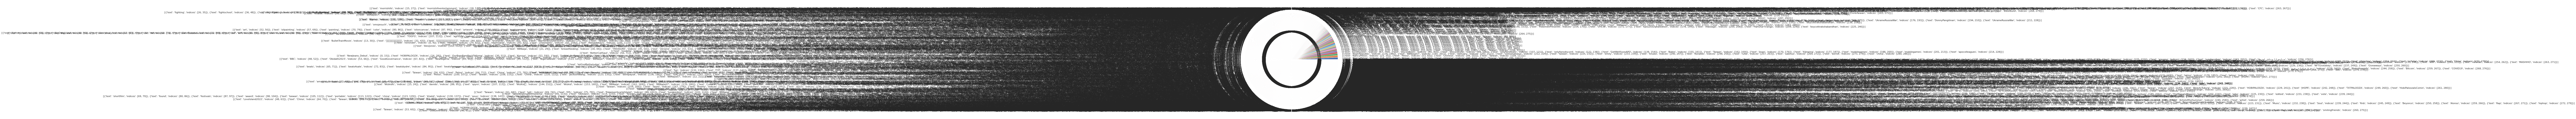

In [61]:
# number of tweets for each airline
sns.set(rc={'figure.figsize':(14,10)})
airline_tweets_df.hashtags.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [62]:
sns.set(rc={'figure.figsize':(12,8)})
airline_sentiment = airline_tweets_df.groupby(['friends_count', 'followers_count']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

/home/tina/Week0/Week0env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/tina/Week0/Week0env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


AttributeError: 'DataFrameGroupBy' object has no attribute 'airline_sentiment'

In [ ]:
airline_tweets_df.columns

In [ ]:
features = airline_tweets_df.iloc[:, 10].values
labels = airline_tweets_df.iloc[:, 1].values

In [ ]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)